# BMW Worldwide Sales EDA & Classification

#### This dataset provides detailed sales information for BMW vehicles from 2010 to 2024 across global regions. It includes attributes such as model, year, engine size, mileage, transmission type, fuel type, price, and sales volume.

### Import Libraries

In [28]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Load CSV file

In [29]:
df = pd.read_csv("BMW sales data (2010-2024) (1).csv")

### Explore Data|

In [30]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [31]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

### Insight

- There is no null value in dataset.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [33]:
df.shape

(50000, 11)

### Insight

- Dataset consist of 50,000 rows and 11 columns.

In [34]:
df.duplicated().sum()

np.int64(0)

### Insight

- There is no duplicated row in Dataset.

In [35]:
df["Total Price"] = df["Price_USD"]*df["Sales_Volume"]

- Feature engineering multiply Price_USD column & Sales_Volume column because the Price_USD column has price of only one car.

In [36]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Total Price
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840


In [37]:
categorical_features = df.select_dtypes(include="object")
numerical_features = df.select_dtypes(exclude="object")

### Data Visualization

- Univariate analysis of categorical features.

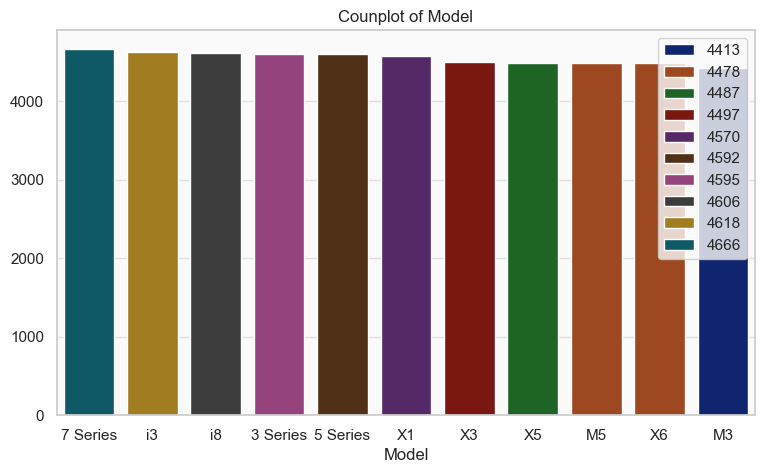

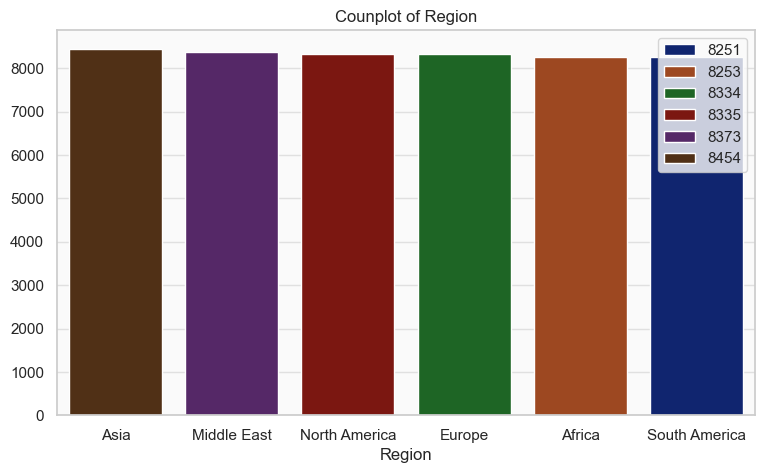

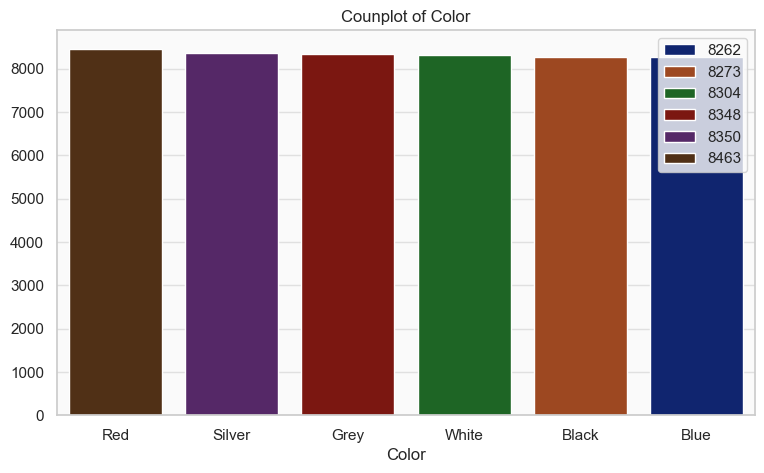

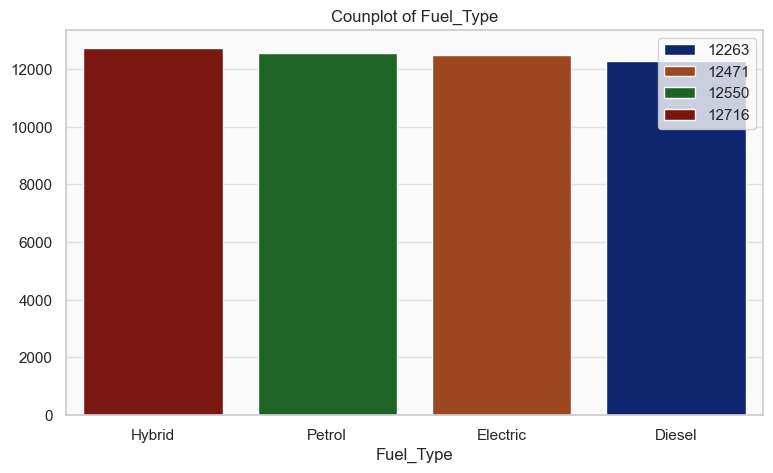

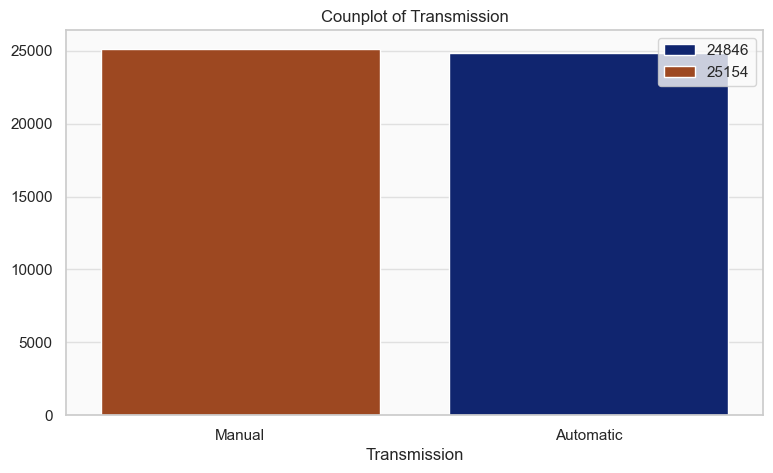

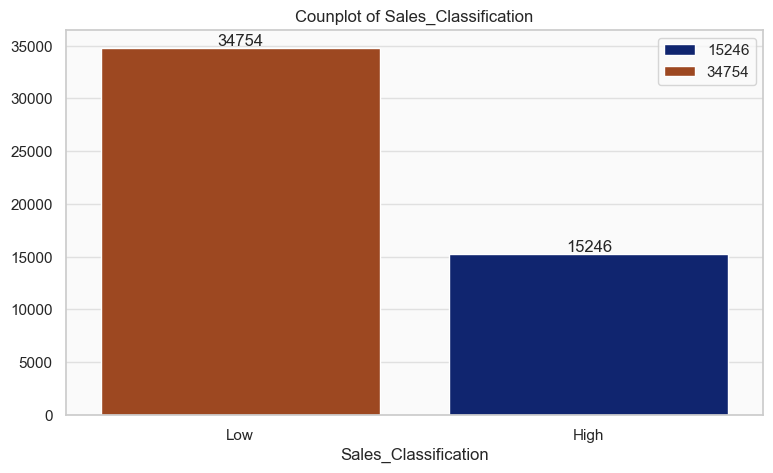

In [38]:
for cat in categorical_features:
    plt.figure(figsize=(9,5))
    val= categorical_features[cat].value_counts()
    sns.barplot(x=val.index , y=val.values , palette="dark" , hue=val.values)
    plt.title(f'Counplot of {cat}')
for index , values in enumerate(val.values):
    plt.text(index , values , str(values) , va="bottom" , ha="center")


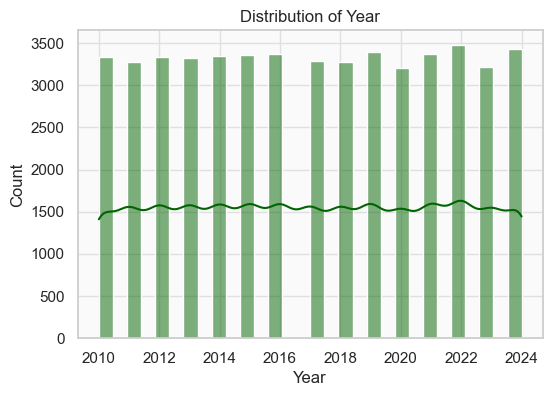

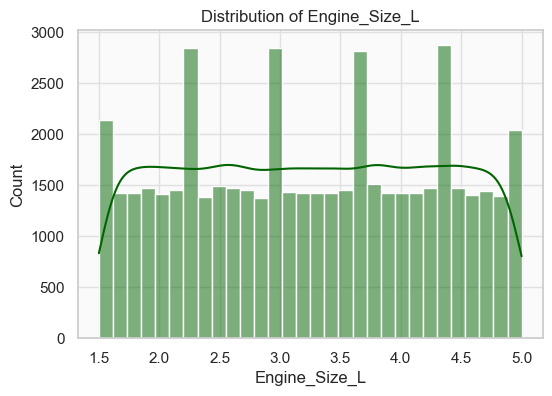

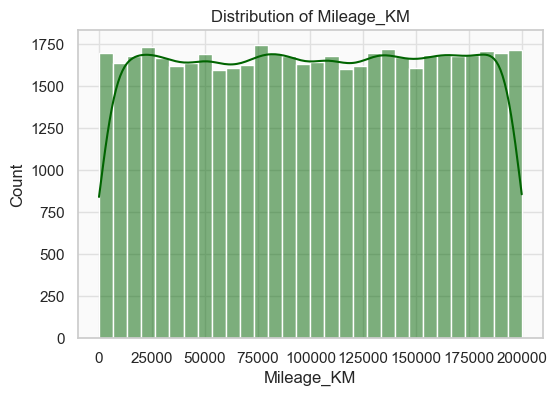

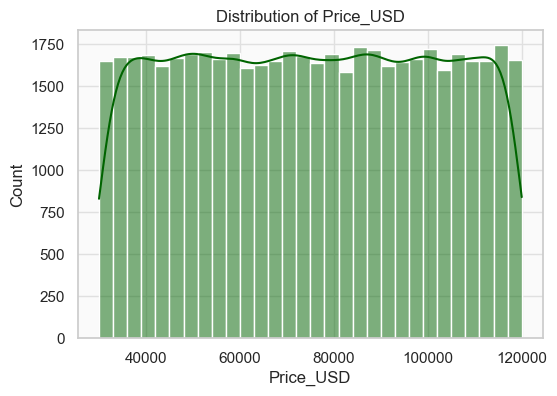

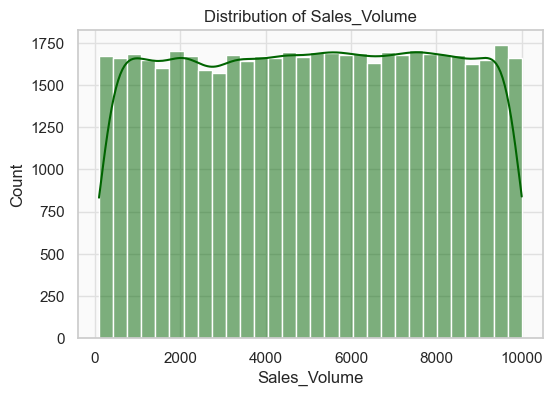

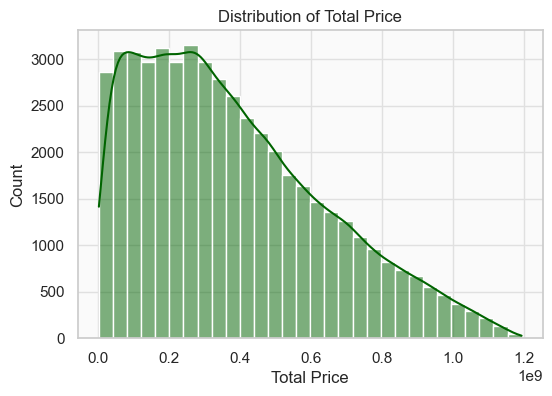

In [39]:
for i in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=i, bins=30, kde=True, color='darkgreen')
    plt.title(f'Distribution of {i}')
    plt.show()

- Distribution of Numerical Features

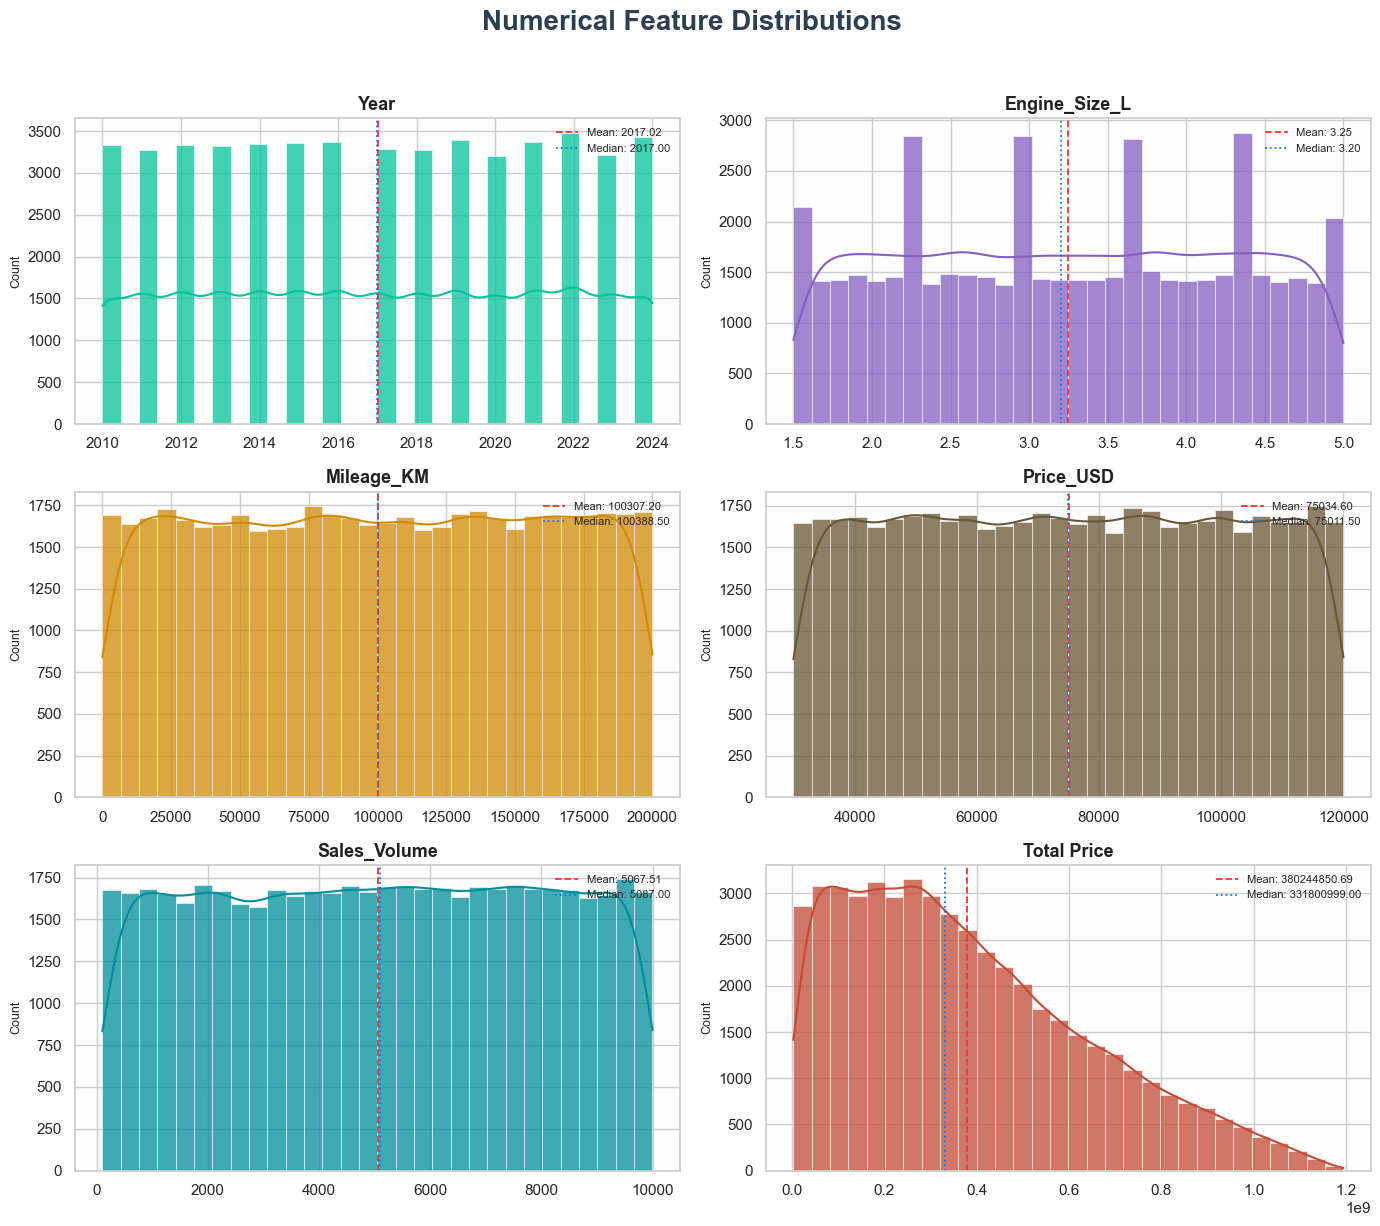

In [40]:
import math 
sns.set_theme(style="whitegrid")
plt.rcParams["axes.facecolor"] = "#fdfdfd"
plt.rcParams["figure.facecolor"] = "#ffffff"

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
rows = math.ceil(len(numerical_cols) / 2)

palette = sns.color_palette(["#2d6a4f", "#00C49A", "#845EC2", "#D28A04", "#685634", "#008E9B", "#C34A36"])

plt.figure(figsize=(14, rows * 4))
plt.suptitle("Numerical Feature Distributions",
             fontsize=20, fontweight='bold', color="#2c3e50", y=1.02)

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 2, i)
    color = palette[i % len(palette)]

    # Histogram with KDE
    sns.histplot(df[col], bins=30, kde=True, color=color, alpha=0.75, edgecolor="white", linewidth=0.4)

    # Mean & Median
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color="#FF3131", linestyle='--', linewidth=1.3, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color="#1A73E8", linestyle=':', linewidth=1.3, label=f'Median: {median_val:.2f}')


    plt.title(f"{col}", fontsize=13, fontweight='bold', color="#212121")
    plt.xlabel("")
    plt.ylabel("Count", fontsize=9)
    plt.legend(loc='upper right', fontsize=8, frameon=False)

plt.tight_layout()
plt.show()

- Check Outliers

In [41]:
values = ["Price_USD" , 'Sales_Volume' , 'Total Price']

for i in values:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]

    if outliers.empty:
        print(f'No outliers found in {i}')
    else:
        print(f'Found {len(outliers)} outliers in {i}')
        print(outliers[i].head())

No outliers found in Price_USD
No outliers found in Sales_Volume
Found 167 outliers in Total Price
154    1154361520
238    1124709120
277    1151740800
726    1133161246
938    1155274407
Name: Total Price, dtype: int64


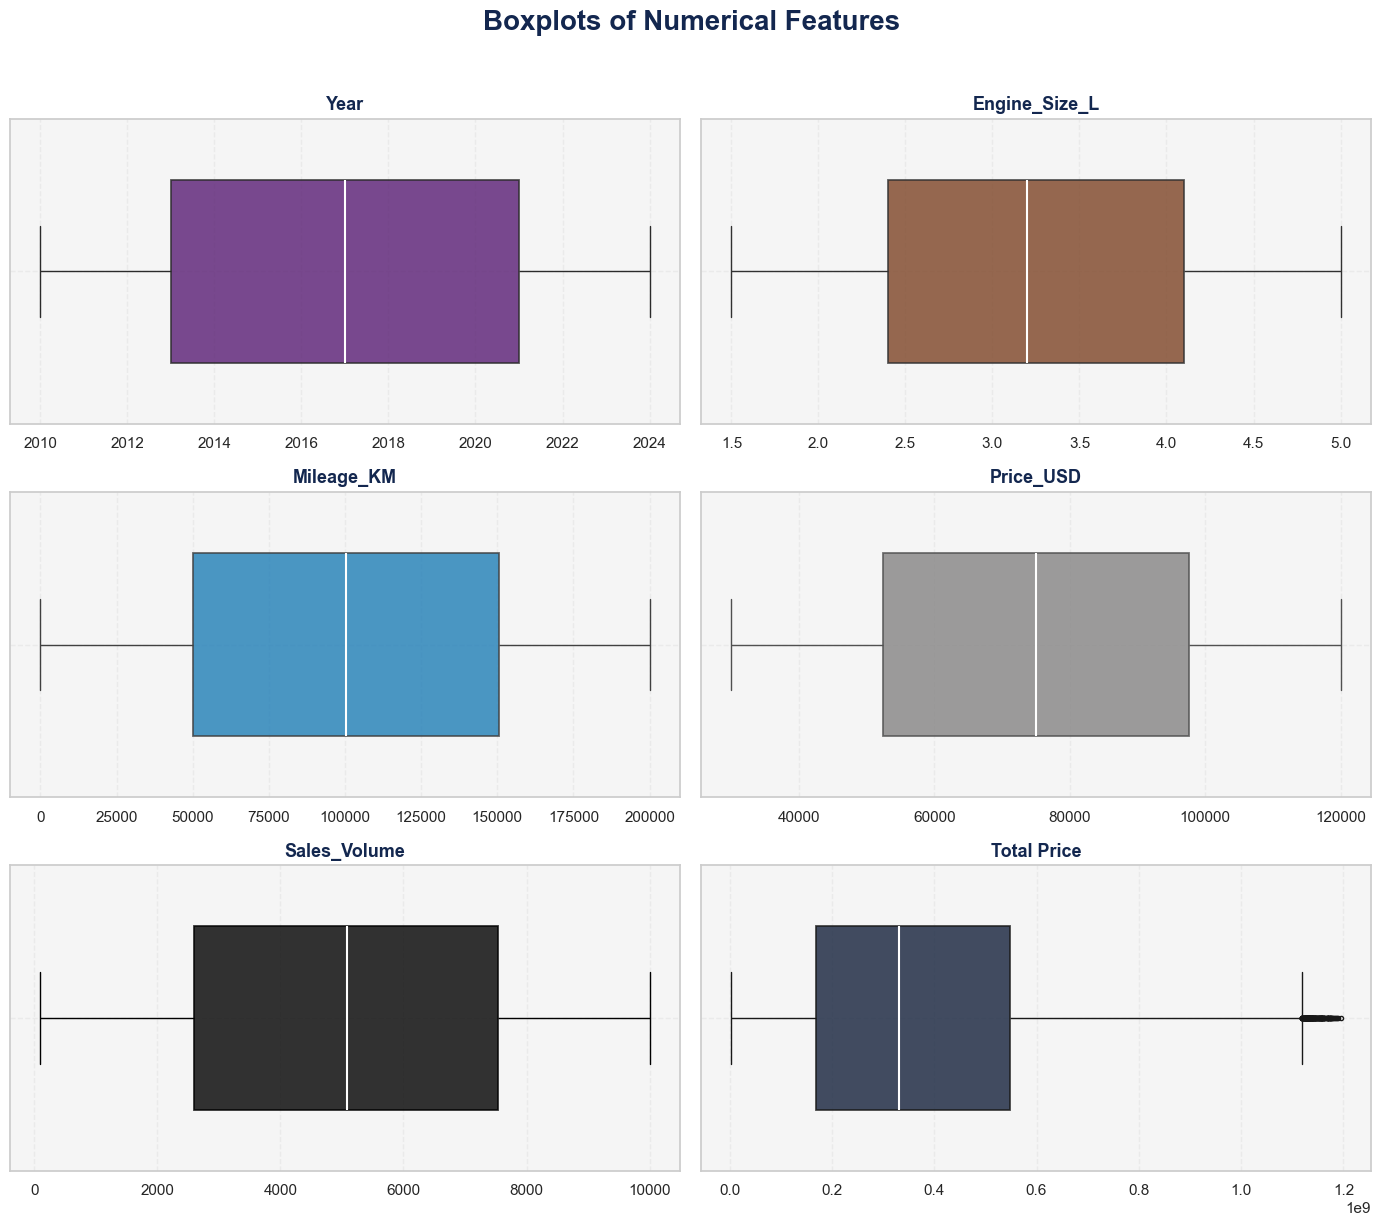

In [42]:
sns.set_theme(style="whitegrid")
plt.rcParams["axes.facecolor"] = "#F5F5F5"
plt.rcParams["figure.facecolor"] = "#FFFFFF"
plt.rcParams["grid.color"] = "#E0E0E0"

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
rows = math.ceil(len(numerical_cols) / 2)

bmw_palette = ["#0D1F42", "#5F0F82", "#8B4018", "#0685CF", "#858484", "#000000"]

plt.figure(figsize=(14, rows * 4))
plt.suptitle("Boxplots of Numerical Features",
             fontsize=20, fontweight='bold', color="#13274F", y=1.02)

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 2, i)
    color = bmw_palette[i % len(bmw_palette)]
    
    sns.boxplot(data=df, x=col, color=color, width=0.6, fliersize=3,
                boxprops=dict(alpha=0.8, linewidth=1.3),
                medianprops=dict(color="#FFFFFF", linewidth=1.5))
    
    # Labels and style
    plt.title(f"{col}", fontsize=13, fontweight='bold', color="#13274F")
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_16800\1922690237.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=col, y='Price_USD',
C:\Users\admin\AppData\Local\Temp\ipykernel_16800\1922690237.py:27: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=grouped, x=col, y='Price_USD',
C:\Users\admin\AppData\Local\Temp\ipykernel_16800\1922690237.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=col, y='Price_USD',
C:\Users\admin\AppData\Local\Temp\ipykernel_16800\1922690237.py:27: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, 

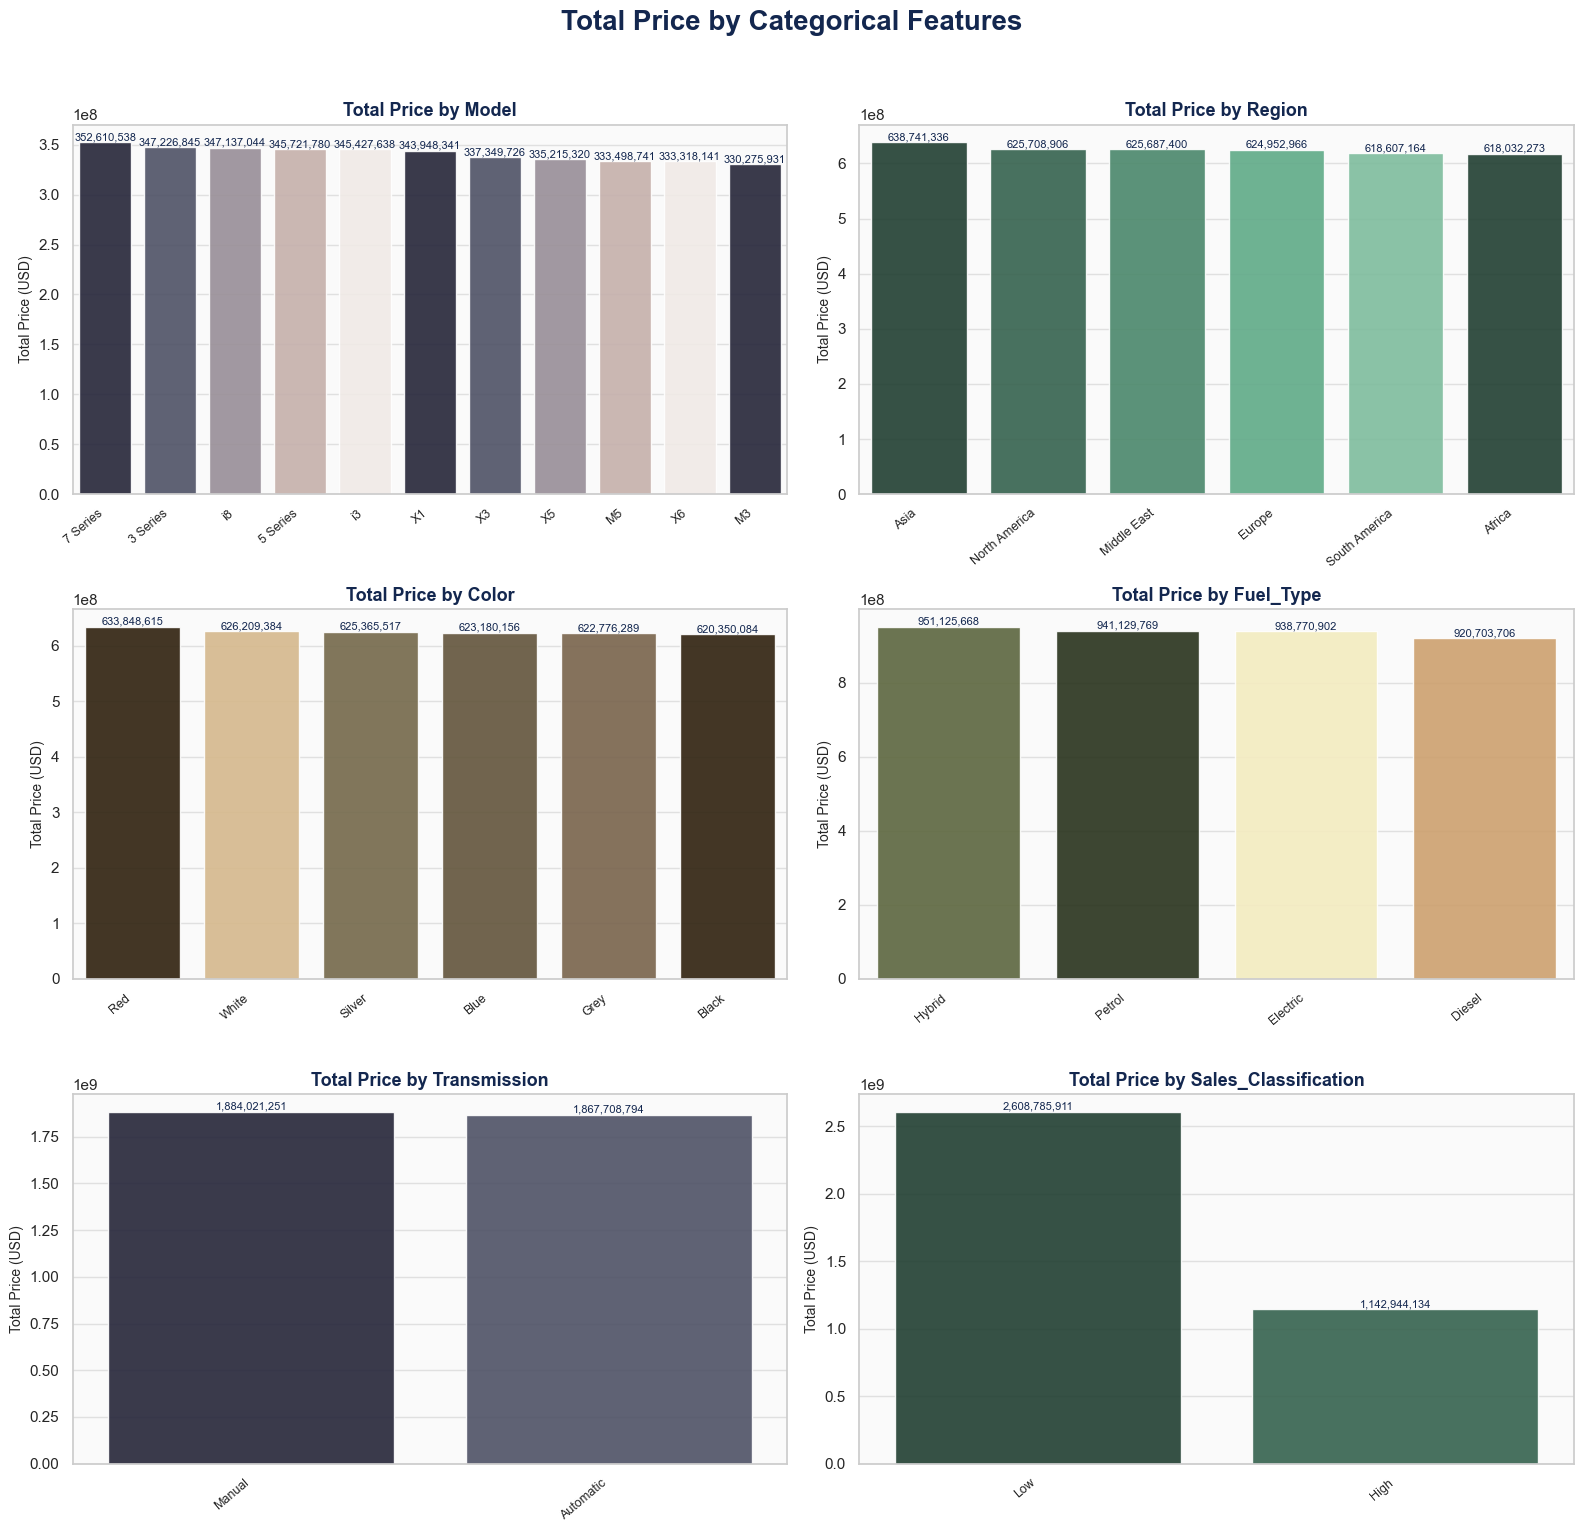

In [43]:
sns.set_theme(style="whitegrid")
plt.rcParams["axes.facecolor"] = "#FAFAFA"
plt.rcParams["figure.facecolor"] = "#FFFFFF"
plt.rcParams["grid.color"] = "#E0E0E0"

categorical_cols = df.select_dtypes(include=['object']).columns

bmw_m_palettes = [
    ["#606c38", "#283618", "#fbf2b8", "#dda15e", "#bc6c25"],  
    ["#22223b", "#4a4e69", "#9a8c98", "#c9ada7", "#f2e9e4"], 
    ["#1b4332", "#2d6a4f", "#40916c", "#52b788", "#74c69d"], 
    ["#352208", "#e1bb80", "#7b6b43", "#685634", "#806443"], 
]

rows = math.ceil(len(categorical_cols) / 2)
plt.figure(figsize=(16, rows * 5))
plt.suptitle("Total Price by Categorical Features",
             fontsize=20, fontweight='bold', color="#13274F", y=1.02)

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 2, i)
    
    grouped = df.groupby(col)['Price_USD'].sum().sort_values(ascending=False).reset_index()
    
    palette = bmw_m_palettes[i % len(bmw_m_palettes)]
    
    sns.barplot(data=grouped, x=col, y='Price_USD',
                palette=palette, alpha=0.9)
    
    plt.xticks(rotation=40, ha='right', fontsize=9)
    
    # Titles and labels
    plt.title(f"Total Price by {col}", fontsize=13, fontweight='bold', color="#13274F")
    plt.ylabel("Total Price (USD)", fontsize=10)
    plt.xlabel("")
    
    for index, value in enumerate(grouped['Price_USD']):
        plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=8, color="#13274F")

plt.tight_layout()
plt.show()

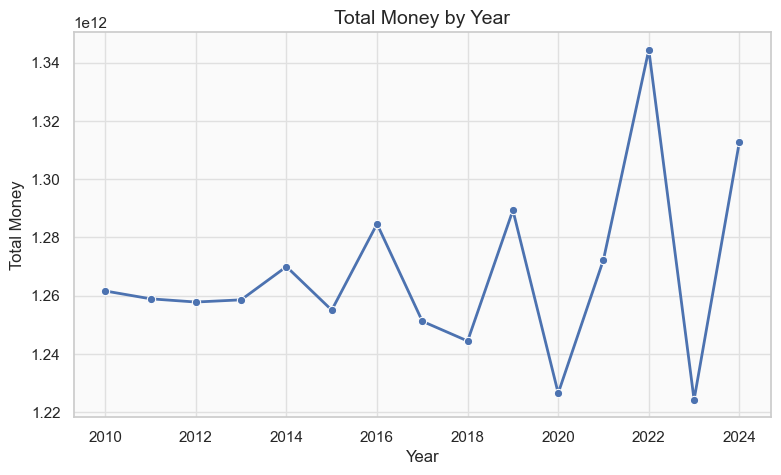

In [44]:
grouped = df.groupby('Year')['Total Price'].sum().reset_index()

plt.figure(figsize=(9,5))
sns.lineplot(data=grouped, x='Year', y='Total Price', marker='o', linewidth=2)

plt.title('Total Money by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Money', fontsize=12)
plt.grid(True)
plt.show()

- Statistics

In [45]:
df.describe().round(1)

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Total Price
count,50000.0,50000.0,50000.0,50000.0,50000.0,5.000000e+04
mean,2017.0,3.2,100307.2,75034.6,5067.5,3.802449e+08
std,4.3,1.0,57941.5,25998.2,2856.8,2.623406e+08
min,2010.0,1.5,3.0,30000.0,100.0,3.410472e+06
25%,2013.0,2.4,50178.0,52434.8,2588.0,1.689871e+08
50%,2017.0,3.2,100388.5,75011.5,5087.0,3.318010e+08
75%,2021.0,4.1,150630.2,97628.2,7537.2,5.486494e+08
max,2024.0,5.0,199996.0,119998.0,9999.0,1.194346e+09


# Model Selection & Preprocessing

In [46]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Total Price
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840


In [47]:
data = df.copy()

In [48]:
data.drop('Total Price' , axis=1 , inplace=True)

In [49]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

### Encoding Categorical Features

In [50]:
le = LabelEncoder()
data['Model'] = le.fit_transform(data['Model'])
data['Region'] = le.fit_transform(data['Region'])
data['Color'] = le.fit_transform(data['Color'])
data['Fuel_Type'] = le.fit_transform(data['Fuel_Type'])
data['Transmission'] = le.fit_transform(data['Transmission'])
data['Sales_Classification'] = le.fit_transform(data['Sales_Classification'])

In [51]:
data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,1,2016,1,3,3,1,3.5,151748,98740,8300,0
1,10,2013,4,3,2,0,1.6,121671,79219,3428,1
2,1,2022,4,1,3,0,4.5,10991,113265,6994,1
3,6,2024,3,1,3,0,1.7,27255,60971,4047,1
4,2,2020,5,0,0,1,2.1,122131,49898,3080,1
